In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import librosa.display
import os

In [110]:
# Function to load and preprocess an audio file
def preprocess_audio(audio_path, output_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract features (e.g., spectrogram)
    mel_spec = librosa.feature.melspectrogram(y=y,sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Save the preprocessed data
    np.save(output_path, mel_spec_db)

# Specify the root folder containing your audio files
root_folder = "C:/Projects/Music_Tagging/moodtheme_audio_low/"

# Specify the folder to save the preprocessed data
output_folder = "C:/Projects/Music_Tagging/mel_spec/"

# Iterate through all subfolders and preprocess audio files
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        # Check if the file is an .mp3 file
        if file.endswith(".mp3"):
            # Construct full path to the audio file
            audio_path = os.path.join(subdir, file)

            # Construct output path for the preprocessed data
            output_path = os.path.join(output_folder, f"{subdir.split('/')[4]}_{os.path.splitext(file)[0]}.npy")

            # Preprocess the audio file
            preprocess_audio(audio_path, output_path)

            print(f"Processed: {audio_path} -> {output_path}")


Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1009600.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1009600.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1012000.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1012000.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1014400.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1014400.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1028900.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1028900.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1032700.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1032700.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1037900.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1037900.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1041500.low.mp3 -> C:/Projects/Music_Tagging/mel_spec/00_1041500.low.npy
Processed: C:/Projects/Music_Tagging/moodtheme_audio_low/00\1042000.l

In [3]:
from mtg_jamendo_dataset.scripts import commons

input_file = 'C:/Projects/Music_Tagging/mtg_jamendo_dataset/data/autotagging_moodtheme.tsv'
tracks, tags, extra = commons.read_file(input_file)

Reading: 18486 tracks, 4506 albums, 1533 artists


In [4]:
tracks

{948: {'artist_id': 87,
  'album_id': 149,
  'path': '48/948.mp3',
  'duration': 212.7,
  'tags': ['mood/theme---background'],
  'genre': set(),
  'instrument': set(),
  'mood/theme': {'background'}},
 950: {'artist_id': 87,
  'album_id': 149,
  'path': '50/950.mp3',
  'duration': 248.0,
  'tags': ['mood/theme---background'],
  'genre': set(),
  'instrument': set(),
  'mood/theme': {'background'}},
 951: {'artist_id': 87,
  'album_id': 149,
  'path': '51/951.mp3',
  'duration': 199.7,
  'tags': ['mood/theme---background'],
  'genre': set(),
  'instrument': set(),
  'mood/theme': {'background'}},
 2165: {'artist_id': 326,
  'album_id': 347,
  'path': '65/2165.mp3',
  'duration': 229.0,
  'tags': ['mood/theme---film'],
  'genre': set(),
  'instrument': set(),
  'mood/theme': {'film'}},
 2263: {'artist_id': 320,
  'album_id': 366,
  'path': '63/2263.mp3',
  'duration': 494.7,
  'tags': ['mood/theme---melancholic'],
  'genre': set(),
  'instrument': set(),
  'mood/theme': {'melancholic'}},

In [5]:
paths = []
tags = []
for song_id, song_data in tracks.items():
    paths.append(song_data['path'])
    tags.append(song_data['mood/theme'])

print(paths[0],tags[0])

48/948.mp3 {'background'}


In [6]:
df = pd.DataFrame({'paths': paths, 'tags': tags})
df.head(10)

,paths,tags
0,48/948.mp3,{background}
1,50/950.mp3,{background}
2,51/951.mp3,{background}
3,65/2165.mp3,{film}
4,63/2263.mp3,{melancholic}
5,46/3346.mp3,"{calm, melodic}"
6,47/3347.mp3,"{calm, melodic}"
7,48/3348.mp3,"{calm, melodic}"
8,49/3349.mp3,"{calm, melodic}"
9,50/3350.mp3,"{calm, melodic}"


In [7]:
df['tags'] = df['tags'].astype(str)
df['tags'] = df['tags'].str.replace('{', '').str.replace('}', '')
df

C:\Users\athar\AppData\Local\Temp\ipykernel_13544\1826813311.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tags'] = df['tags'].str.replace('{', '').str.replace('}', '')


,paths,tags
0,48/948.mp3,'background'
1,50/950.mp3,'background'
2,51/951.mp3,'background'
3,65/2165.mp3,'film'
4,63/2263.mp3,'melancholic'
...,...,...
18481,56/1422056.mp3,"'movie', 'advertising', 'epic', 'dramatic'"
18482,57/1422057.mp3,"'movie', 'advertising', 'epic', 'dramatic'"
18483,58/1422058.mp3,"'movie', 'epic', 'dramatic'"
18484,59/1422059.mp3,"'movie', 'advertising', 'epic', 'dramatic'"


In [8]:
df['paths'] = df['paths'].str.replace('/', '_')
df

,paths,tags
0,48_948.mp3,'background'
1,50_950.mp3,'background'
2,51_951.mp3,'background'
3,65_2165.mp3,'film'
4,63_2263.mp3,'melancholic'
...,...,...
18481,56_1422056.mp3,"'movie', 'advertising', 'epic', 'dramatic'"
18482,57_1422057.mp3,"'movie', 'advertising', 'epic', 'dramatic'"
18483,58_1422058.mp3,"'movie', 'epic', 'dramatic'"
18484,59_1422059.mp3,"'movie', 'advertising', 'epic', 'dramatic'"


In [9]:
df['paths'] = 'C:/Projects/Music_Tagging/large_mel_spec/' + df['paths']

# Display the modified DataFrame
print(df)

                                                   paths  \
0      C:/Projects/Music_Tagging/large_mel_spec/48_94...   
1      C:/Projects/Music_Tagging/large_mel_spec/50_95...   
2      C:/Projects/Music_Tagging/large_mel_spec/51_95...   
3      C:/Projects/Music_Tagging/large_mel_spec/65_21...   
4      C:/Projects/Music_Tagging/large_mel_spec/63_22...   
...                                                  ...   
18481  C:/Projects/Music_Tagging/large_mel_spec/56_14...   
18482  C:/Projects/Music_Tagging/large_mel_spec/57_14...   
18483  C:/Projects/Music_Tagging/large_mel_spec/58_14...   
18484  C:/Projects/Music_Tagging/large_mel_spec/59_14...   
18485  C:/Projects/Music_Tagging/large_mel_spec/60_14...   

                                             tags  
0                                    'background'  
1                                    'background'  
2                                    'background'  
3                                          'film'  
4                  

In [11]:
df['paths'] = df['paths'].str.replace('.mp3', '.low.mp3')

# Display the modified DataFrame
df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_13544\2109856374.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['paths'] = df['paths'].str.replace('.mp3', '.low.mp3')


,paths,tags
0,C:/Projects/Music_Tagging/large_mel_spec/48_94...,'background'
1,C:/Projects/Music_Tagging/large_mel_spec/50_95...,'background'
2,C:/Projects/Music_Tagging/large_mel_spec/51_95...,'background'
3,C:/Projects/Music_Tagging/large_mel_spec/65_21...,'film'
4,C:/Projects/Music_Tagging/large_mel_spec/63_22...,'melancholic'


In [12]:
df['paths'] = df['paths'].str.replace('.mp3', '.npy')

# Display the modified DataFrame
df.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_13544\1657595252.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['paths'] = df['paths'].str.replace('.mp3', '.npy')


,paths,tags
0,C:/Projects/Music_Tagging/large_mel_spec/48_94...,'background'
1,C:/Projects/Music_Tagging/large_mel_spec/50_95...,'background'
2,C:/Projects/Music_Tagging/large_mel_spec/51_95...,'background'
3,C:/Projects/Music_Tagging/large_mel_spec/65_21...,'film'
4,C:/Projects/Music_Tagging/large_mel_spec/63_22...,'melancholic'


In [13]:
df['paths'][0]

'C:/Projects/Music_Tagging/large_mel_spec/48_948.low.npy'

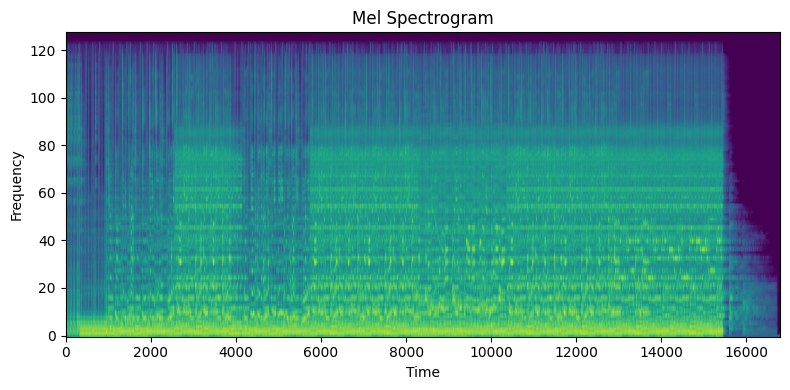

In [14]:
npy_file_path = df['paths'][5]

# Load the .npy file
mel_spectrogram = np.load(npy_file_path)

# Visualize the mel spectrogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(mel_spectrogram, cmap='viridis', origin='lower', aspect='auto')
ax.set_title('Mel Spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_13544\1133794218.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  mel_spectrogram_resized = mel_spectrogram_pil.resize(target_size, Image.ANTIALIAS)


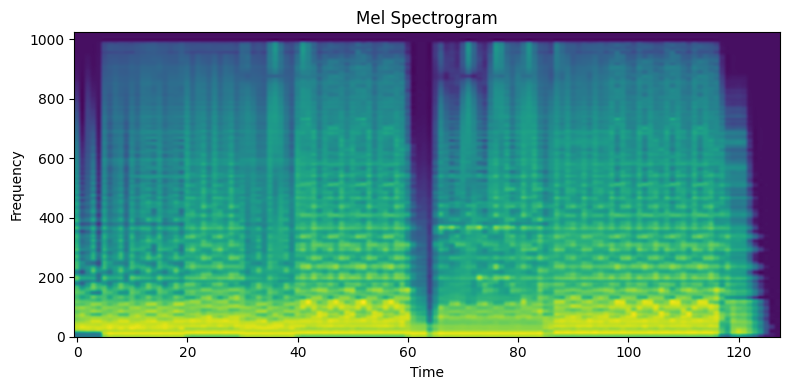

In [20]:
from PIL import Image
mel_spectrogram = np.load(df['paths'][0])

# Resize the mel spectrogram to 128x128 pixels using Pillow (PIL)
target_size = (128, 1024)
mel_spectrogram_pil = Image.fromarray(mel_spectrogram)
mel_spectrogram_resized = mel_spectrogram_pil.resize(target_size, Image.ANTIALIAS)

# Convert the resized PIL image back to a NumPy array
mel_spectrogram_resized_array = np.array(mel_spectrogram_resized)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(mel_spectrogram_resized_array, cmap='viridis', origin='lower', aspect='auto')
ax.set_title('Mel Spectrogram')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
import concurrent.futures

source_folder = 'C:/Projects/Music_Tagging/large_mel_spec/'
destination_folder = 'C:/Projects/Music_Tagging/resized_data/'

os.makedirs(destination_folder, exist_ok=True)

# Function to resize and save .npy files
def resize_and_save_npy(file_path):
    # Load the .npy file
    mel_spectrogram = np.load(os.path.join(source_folder, file_path))

    # Resize the mel spectrogram to 128x128 pixels using Pillow (PIL)
    target_size = (128, 1024)
    mel_spectrogram_pil = Image.fromarray(mel_spectrogram)
    mel_spectrogram_resized = mel_spectrogram_pil.resize(target_size, Image.NEAREST)

    # Convert the resized PIL image back to a NumPy array
    mel_spectrogram_resized_array = np.array(mel_spectrogram_resized)

    # Save the resized mel spectrogram to the destination folder
    resized_file_path = os.path.join(destination_folder, file_path)
    np.save(resized_file_path, mel_spectrogram_resized_array)

# Use concurrent.futures to parallelize the resizing and saving process
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(resize_and_save_npy, df['paths'])

# Optional: Print a message to confirm completion
print("Resizing and saving complete.")

C:\Users\athar\AppData\Local\Temp\ipykernel_13544\582680843.py:16: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  mel_spectrogram_resized = mel_spectrogram_pil.resize(target_size, Image.NEAREST)


Resizing and saving complete.
